# Import of all libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Loading the dataset for further analysis

In [68]:
file_path = 'C:/Users/42073/Desktop/_Python/Datasety/breastcanc.csv' #download the file from the repository and change the path
df = pd.read_csv (file_path)
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# Plotting the target value

# Analysis of the dataset and overall cleaning

In [69]:
clean_data = df.drop(['Unnamed: 32', 'id'], axis = 'columns')

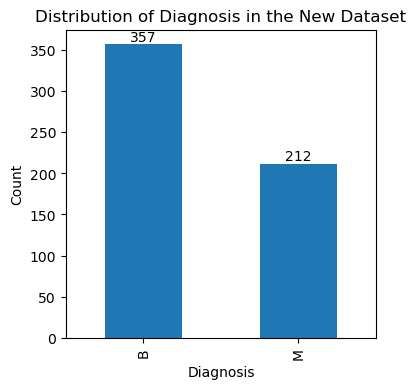

In [70]:
# Create the bar chart
plt.figure(figsize=(4, 4))
ax = df['diagnosis'].value_counts().plot(kind='bar')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis in the New Dataset')

# Display the values of the bars above the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

# Encoding of your data for model processing
## ML models work with numbers, so you need to encode everything what isn´t a value for proepr functioning

In [71]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable 'diagnosis'
y_encoded = label_encoder.fit_transform(clean_data['diagnosis'])

# Fitting the model and its accuracy
for complete code without any disruptions just copy this
from sklearn.preprocessing import LabelEncoder

Initialize the LabelEncoder
label_encoder = LabelEncoder()

Fit and transform the target variable 'diagnosis'
y_encoded = label_encoder.fit_transform(clean_data['diagnosis'])

X = clean_data.drop('diagnosis', axis=1) y = clean_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = XGBClassifier()

model.fit(X_train, y_train)

Predict using the model on the test data
predictions = model.predict(X_test)

Calculate accuracy on the test data
accuracy = accuracy_score(y_test, predictions) print("Accuracy:", accuracy)

In [72]:
X = clean_data.drop('diagnosis', axis=1)
y = clean_data['diagnosis']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Choosing the model 

In [74]:
model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
# Predict using the model on the test data
predictions = model.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.956140350877193


# Validaiton of the model

In [76]:
scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')

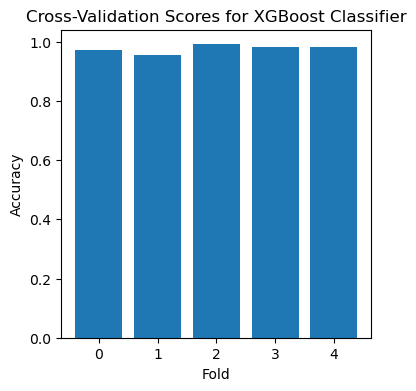

In [77]:
plt.figure(figsize=(4, 4))
plt.bar(range(len(scores)), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for XGBoost Classifier')
plt.show()


# Confusion matrix


Quadrant and its predicitons - 114 cases because of len(X_test)

1.True Positives (TP): The number of instances that were correctly predicted as positive (e.g., "B" in your case).

2.True Negatives (TN): The number of instances that were correctly predicted as negative (e.g., "M" in your case).

3.False Positives (FP): The number of instances that were incorrectly predicted as positive when they were actually negative. These are also known as Type I errors.

4.False Negatives (FN): The number of instances that were incorrectly predicted as negative when they were actually positive. These are also known as Type II errors.
          

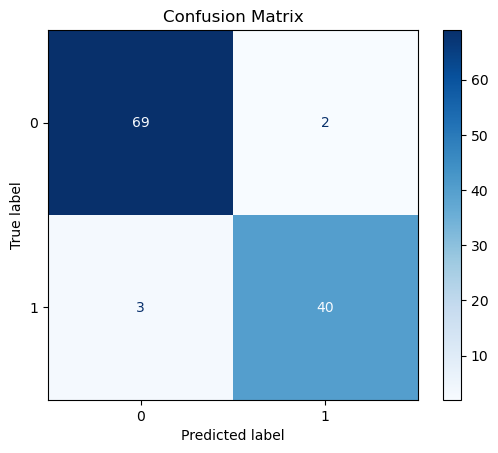

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the classifier 'model' and the test data 'X_test' and 'y_test'
predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)  # Set the colormap to cm.Blues
plt.title("Confusion Matrix")
plt.show()

# Plotting the decision tree.....exporting to the JPEG for better readability

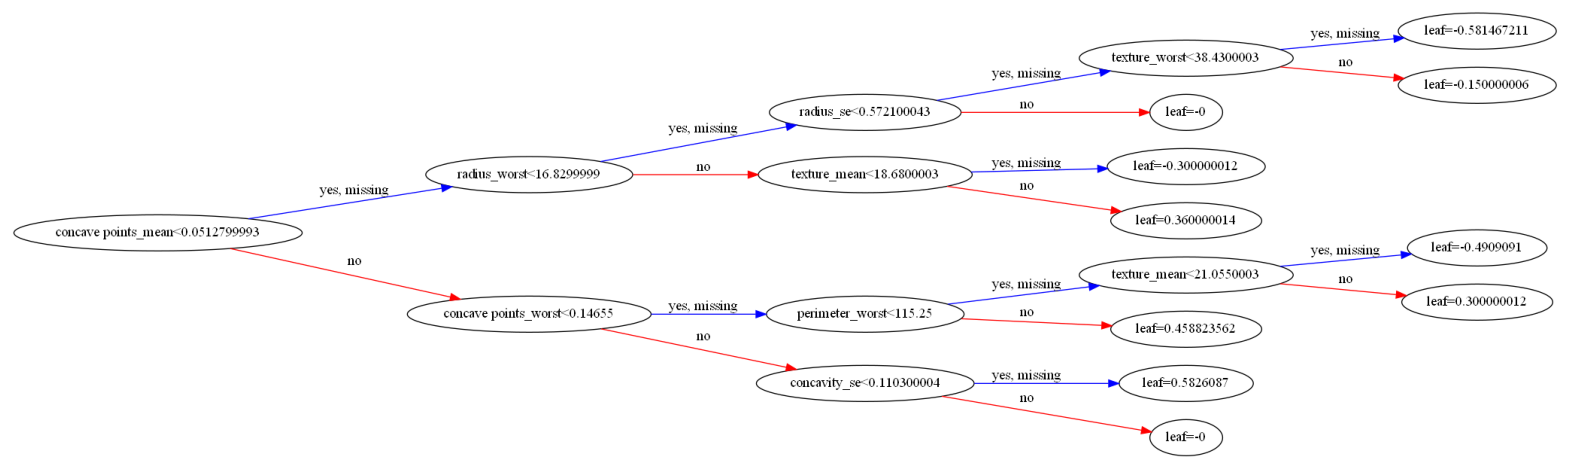

In [79]:
from xgboost import XGBClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have X_train and y_train as your training data
model = XGBClassifier()
model.fit(X_train, y_train)

# Specify the index of the tree you want to visualize (if you have multiple trees)
tree_index = 0

# Create a larger Matplotlib figure
plt.figure(figsize=(20, 10))

# Create an axis to hold the decision tree plot
ax = plt.gca()

# Plot the decision tree on the axis
plot_tree(model, num_trees=tree_index, ax=ax, rankdir='LR')

# Save the plot as a high-quality JPEG image to a specific folder

#output_folder = "C:/Users/42073/Desktop/_Python/Datasety"  # Replace with the path to your desired folder
#output_filename = f"decision_tree_{tree_index}.jpeg"
#output_filepath = f"{output_folder}/{output_filename}"
#plt.savefig(output_filepath, format='jpeg', dpi=300)

# Show the plot (optional)
plt.show()

# -----------------------------------------TEST PHASE-------------------------------------------

# Mixing the previous dataset to random target values and see the evaluation of the model

In [97]:
df['diagnosis'] = np.random.permutation(df['diagnosis'])

In [98]:
df = new_data

In [99]:
output_file_path = 'C:/Users/42073/Desktop/_Python/Datasety/new_Data.csv'  # Replace 'path_to_new_dataset.csv' with your desired file path
new_Data.to_csv(output_file_path, index=False)

# Uploading this new Dataset for testing

In [100]:
file_path = 'C:/Users/42073/Desktop/_Python/Datasety/new_Data.csv'
new_data = pd.read_csv(file_path)

In [101]:
new_data.drop(['Unnamed: 32', 'id'], axis = 'columns', inplace = True)

In [102]:
new_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,B,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,B,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,B,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,B,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,B,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,B,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Evaluation of the model´s predictability

In [103]:
new_X = new_data.drop('diagnosis', axis=1)

# Predict using the model on the new data
new_predictions = model.predict(new_X)

In [104]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' is the encoded target variable of the test set
new_y_encoded = label_encoder.transform(new_data['diagnosis'])

# Calculate accuracy on the new data
new_accuracy = accuracy_score(new_y_encoded, new_predictions)
print("Accuracy on the new dataset:", new_accuracy)

Accuracy on the new dataset: 0.5377855887521968


# Plotting the model´s accuracy and its tresholds

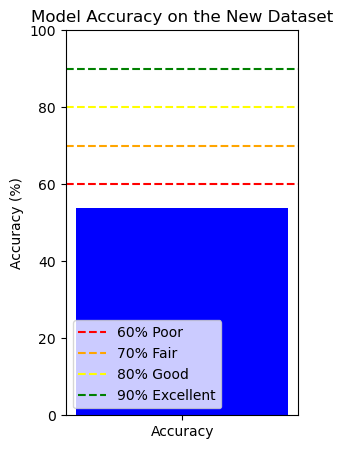

In [105]:
import matplotlib.pyplot as plt

# Assuming 'new_accuracy' is the accuracy score of the model on the new dataset
accuracy_labels = ['Accuracy']
accuracy_scores = [new_accuracy]

# Convert accuracy score to percentage
accuracy_percent = new_accuracy * 100

# Create a bar chart with the accuracy as a percentage
plt.figure(figsize=(3, 5))  # Adjust the figure size for better readability
plt.bar(accuracy_labels, accuracy_percent, color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy on the New Dataset')

# Set the y-axis limit to 100% for better readability
plt.ylim(0, 100)

# Add vertical lines on the y-axis at points 60,70,80,90

plt.axhline(y=60, color='red', linestyle='--', label='60% Poor')
plt.axhline(y=70, color='orange', linestyle='--', label='70% Fair')
plt.axhline(y=80, color='yellow', linestyle='--', label='80% Good')
plt.axhline(y=90, color='green', linestyle='--', label='90% Excellent')

# Display the legend for the vertical lines
plt.legend()

plt.show()

In [106]:
new_predictions_labels = label_encoder.inverse_transform(new_predictions)

# Filter the incorrectly predicted instances
incorrect_predictions = new_data[new_data['diagnosis'] != new_predictions_labels]

# Print the incorrectly predicted instances
print("Incorrectly predicted instances:")
print(incorrect_predictions)

Incorrectly predicted instances:
    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1           B        20.57         17.77          132.90     1326.0   
2           B        19.69         21.25          130.00     1203.0   
3           B        11.42         20.38           77.58      386.1   
4           B        20.29         14.34          135.10     1297.0   
7           B        13.71         20.83           90.20      577.9   
..        ...          ...           ...             ...        ...   
562         B        15.22         30.62          103.40      716.9   
563         B        20.92         25.09          143.00     1347.0   
564         B        21.56         22.39          142.00     1479.0   
565         B        20.13         28.25          131.20     1261.0   
566         B        16.60         28.08          108.30      858.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1            0.08474           0.07

# Plotting the bar chart of diagnosis for this given dataset to comapre with previous dataset

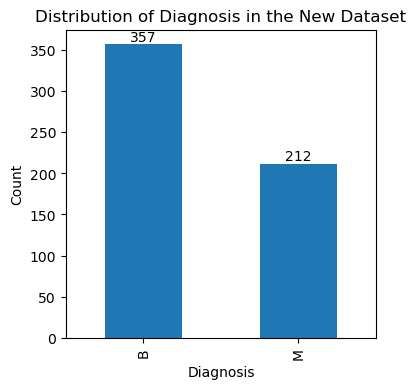

In [107]:
# Create the bar chart
plt.figure(figsize=(4, 4))
ax = new_data['diagnosis'].value_counts().plot(kind='bar')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis in the New Dataset')

# Display the values of the bars above the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

In [108]:
new_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

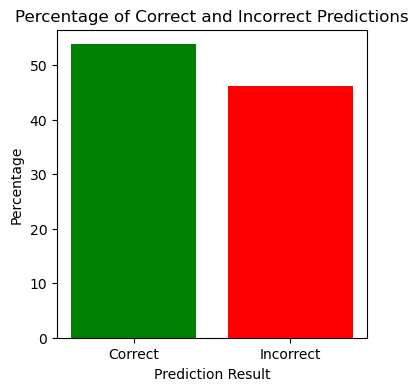

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming you have already loaded and preprocessed your DataFrame 'new_data'
# Assuming you have already defined 'label_encoder', 'new_predictions', and 'new_y_encoded'

# Calculate accuracy on the new data
new_accuracy = accuracy_score(new_y_encoded, new_predictions)

# Calculate the percentage of correct and incorrect predictions
correct_percentage = new_accuracy * 100
incorrect_percentage = (1 - new_accuracy) * 100

# Plot the graph
plt.figure(figsize=(4, 4))
#plt.bar(['Correct', 'Incorrect'], [correct_percentage, incorrect_percentage])
plt.bar('Correct', correct_percentage, color='green')
plt.bar('Incorrect', incorrect_percentage, color='red')


plt.xlabel('Prediction Result')
plt.ylabel('Percentage')
plt.title('Percentage of Correct and Incorrect Predictions')
plt.show()

In [110]:
# Assuming 'new_predictions_labels' is already defined
# Filter the incorrectly predicted instances
incorrect_predictions = new_data[new_data['diagnosis'] != new_predictions_labels]

# Print the rows where the model made a mistake
print("Incorrectly predicted instances:")
print(incorrect_predictions)

Incorrectly predicted instances:
    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1           B        20.57         17.77          132.90     1326.0   
2           B        19.69         21.25          130.00     1203.0   
3           B        11.42         20.38           77.58      386.1   
4           B        20.29         14.34          135.10     1297.0   
7           B        13.71         20.83           90.20      577.9   
..        ...          ...           ...             ...        ...   
562         B        15.22         30.62          103.40      716.9   
563         B        20.92         25.09          143.00     1347.0   
564         B        21.56         22.39          142.00     1479.0   
565         B        20.13         28.25          131.20     1261.0   
566         B        16.60         28.08          108.30      858.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1            0.08474           0.07

# Number of values where the model did not predict correctly

In [111]:
# Assuming 'new_predictions_labels' is already defined
# Filter the incorrectly predicted instances
incorrect_predictions = new_data[new_data['diagnosis'] != new_predictions_labels]

# Create a new DataFrame from the incorrectly predicted instances
incorrect_df = pd.DataFrame(incorrect_predictions)

len(incorrect_df)



263